In [2]:
import pandas as pd
import numpy as np

In [3]:
df= pd.read_csv('/Users/s650232/Desktop/True_Test.csv', index_col='date',parse_dates=True)

In [4]:
df.index.freq="D"

In [5]:
df.head()

,trailers
date,
2019-05-13,1172
2019-05-14,937
2019-05-15,966
2019-05-16,972
2019-05-17,1111


In [6]:
df.tail()

,trailers
date,
2021-01-30,1198
2021-01-31,1288
2021-02-01,1252
2021-02-02,1281
2021-02-03,1128


In [9]:
df= df.dropna()

In [10]:
df.tail()

,trailers
date,
2021-01-30,1198
2021-01-31,1288
2021-02-01,1252
2021-02-02,1281
2021-02-03,1128


In [11]:
df.columns

Index(['trailers'], dtype='object')

NameError: name 'cols' is not defined

In [13]:
df1.head()

,trailers
date,
2019-05-13,1172
2019-05-14,937
2019-05-15,966
2019-05-16,972
2019-05-17,1111


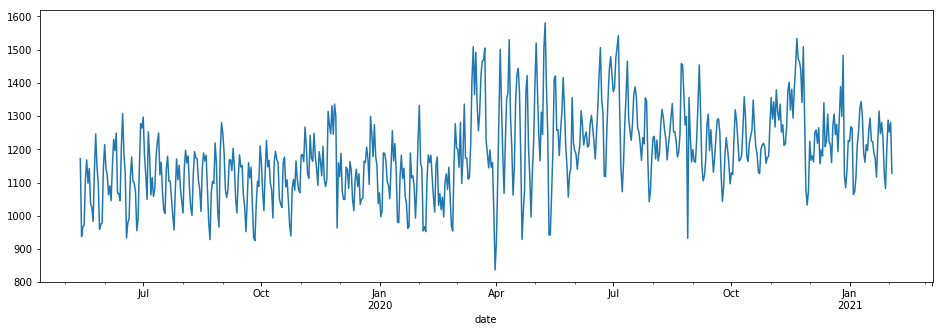

In [15]:
df['trailers'].plot(figsize=(16,5))

In [24]:
df1[df1['holiday']==1].index

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

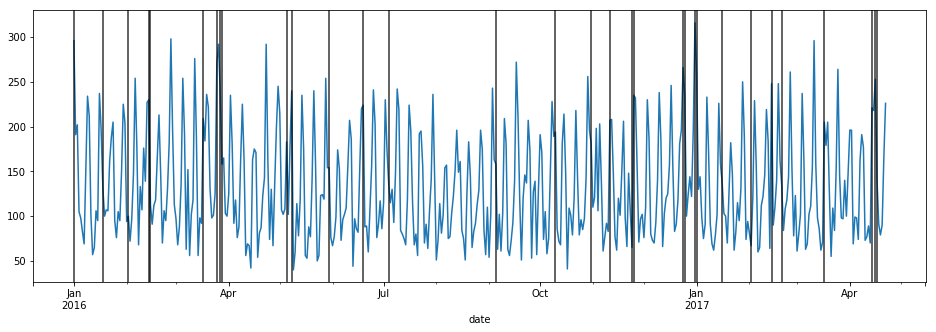

In [26]:
ax = df1['total'].plot(figsize=(16,5))
for day in df1.query('holiday==1').index:
    ax.axvline(x=day, color ='black', alpha=0.8)

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

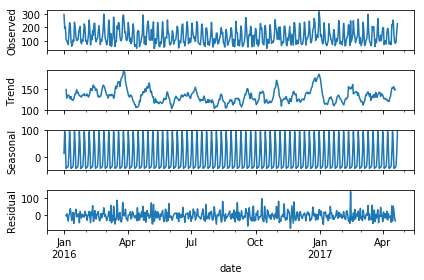

In [31]:
result = seasonal_decompose(df1['total'])
result.plot();

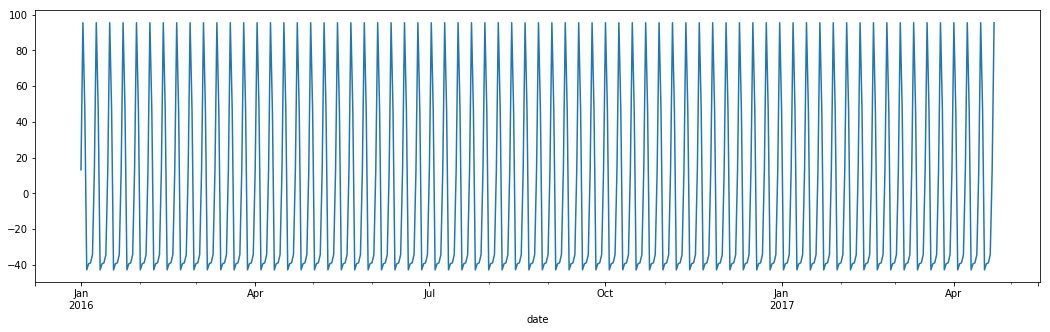

In [35]:
result.seasonal.plot(figsize=(18,5))

In [36]:
len(df1)

478

In [38]:
train = df1.iloc[:436]

In [39]:
test = df1.iloc[436:]

In [40]:
from pmdarima import auto_arima

In [42]:
auto_arima(df1['total'], seasonal=True, m=7).summary()

C:\Users\s650232\.conda\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\s650232\.conda\envs\tsa_course\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
C:\Users\s650232\.conda\envs\tsa_course\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  478
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2417.721
Date:                           Wed, 13 Jan 2021   AIC                           4845.442
Time:                                   12:40:21   BIC                           4866.290
Sample:                                        0   HQIC                          4853.638
                                           - 478                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     20.5662      4.363      4.714      0.000      12.015      29.118
ar.L1          0.1897      0.045      4.221      0.000       0.102       0.278
ar.S.L7        0.4258      0.037     11.606      0.000       0.354       0.498
ar.S.L14       0.3873      0.036     10.734      0.000       0.317       0.458
sigma2      1427.3967     86.679     16.468      0.000    1257.510    1597.283
===================================================================================
Ljung-Box (Q):                       77.20   Jarque-Bera (JB):                27.47
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                             0.47
Prob(H) (two-sided):                  0.18   Kurtosis:                         3.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [47]:
model= SARIMAX(train['total'],order=(1,0,0), seasonal_order=(2,0,0,7))

In [50]:
results = model.fit()

In [51]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2224.701
Date:                           Wed, 13 Jan 2021   AIC                           4457.403
Time:                                   12:49:12   BIC                           4473.713
Sample:                               01-01-2016   HQIC                          4463.840
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2212      0.047      4.711      0.000       0.129       0.313
ar.S.L7        0.5063      0.036     14.187      0.000       0.436       0.576
ar.S.L14       0.4574      0.037     12.379      0.000       0.385       0.530
sigma2      1520.2899     82.277     18.478      0.000    1359.029    1681.550
===================================================================================
Ljung-Box (Q):                       83.96   Jarque-Bera (JB):                29.23
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.34
Prob(H) (two-sided):                  0.37   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
start = len(train)
end=len(train) +len(test) - 1

In [57]:
predictions = results.predict(start, end).rename('SARIMA MODEL')

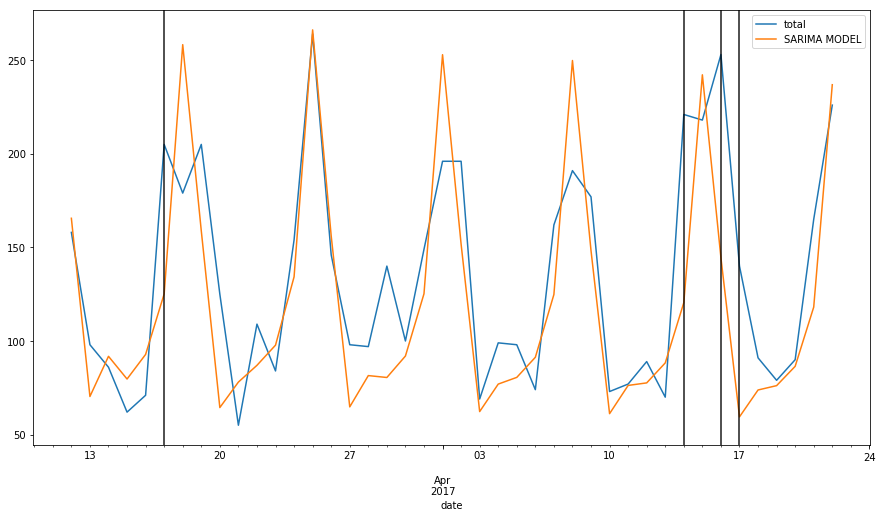

In [60]:
ax= test['total'].plot(legend=True, figsize=(15,8))
predictions.plot(legend=True)

for day in test.query('holiday==1').index:
    ax.axvline(x=day, color ='black', alpha=0.9)


In [63]:
from statsmodels.tools.eval_measures import rmse

In [65]:
rmse(test['total'], predictions)

41.263154972797885

In [66]:
test['total'].mean()

134.26190476190476

In [69]:
auto_arima(df1['total'],exogenous=df1[['holiday']], seasonal=True,M=7).summary()

C:\Users\s650232\.conda\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\s650232\.conda\envs\tsa_course\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
C:\Users\s650232\.conda\envs\tsa_course\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either 

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  478
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -2549.920
Date:                Wed, 13 Jan 2021   AIC                           5107.841
Time:                        13:08:03   BIC                           5124.519
Sample:                             0   HQIC                          5114.398
                                - 478                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    129.4727      4.178     30.992      0.000     121.285     137.661
x1            67.4506      8.372      8.057      0.000      51.042      83.860
ma.L1          0.5748      0.043     13.452      0.000       0.491       0.659
sigma2      2515.9395    175.841     14.308      0.000    2171.297    2860.582
===================================================================================
Ljung-Box (Q):                     1608.75   Jarque-Bera (JB):                40.41
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                             0.70
Prob(H) (two-sided):                  0.43   Kurtosis:                         3.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [70]:
#Train our SARIMAX model

In [138]:
model = SARIMAX(train['total'],exog=train['holiday'],order=(0,0,1),seasonal_order=(1,0,0,7))

In [139]:
result= model.fit()


In [140]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(0, 0, 1)x(1, 0, 0, 7)   Log Likelihood               -2208.335
Date:                           Wed, 13 Jan 2021   AIC                           4424.670
Time:                                   13:32:30   BIC                           4440.981
Sample:                               01-01-2016   HQIC                          4431.107
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       67.6131      4.198     16.104      0.000      59.384      75.842
ma.L1          0.1740      0.052      3.323      0.001       0.071       0.277
ar.S.L7        0.9546      0.013     71.907      0.000       0.929       0.981
sigma2      1412.5218     89.266     15.824      0.000    1237.563    1587.481
===================================================================================
Ljung-Box (Q):                      122.09   Jarque-Bera (JB):                 1.80
Prob(Q):                              0.00   Prob(JB):                         0.41
Heteroskedasticity (H):               1.02   Skew:                             0.05
Prob(H) (two-sided):                  0.89   Kurtosis:                         3.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [142]:
start=len(train)
end =len(train)+len(test)-1

In [143]:

#exog_forecast = test[['holiday']]  # requires two brackets to yield a shape of (35,1)
#predictions = results.predict(start=start, end=end, exog=exog_forecast).rename('SARIMAX(1,0,0)(2,0,0,7) Predictions')
predictions = result.predict(start, end,exog=test[['holiday']]).rename('SAIMAX with EXO')

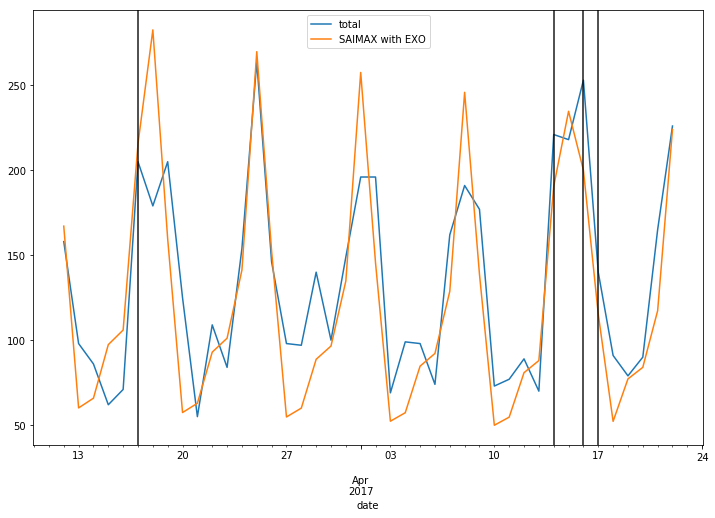

In [144]:
ax =test['total'].plot(figsize=(12,8), legend=True)
predictions.plot(legend=True)

for day in test.query('holiday==1').index:
    ax.axvline(x=day, color ='black', alpha=0.9)


In [145]:
rmse(test['total'], predictions)

35.55634692572138

In [150]:
model = SARIMAX(df1['total'], exog=df1[['holiday']],order=(1,0,1),seasonal_order=(1,0,1,7), enforce_invertibility=False)

In [151]:
reuslts=model.fit()

In [154]:
exog_forecast = df[478:][['holiday']]

In [158]:
fcast = results.predict(len(df1),len(df1)+38, exog=exog_forecast).rename("FINAL SARIMAX FORECAST")

C:\Users\s650232\.conda\envs\tsa_course\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1967: ValueWarning: Exogenous array provided to predict, but additional data not required. `exog` argument ignored.
  ' required. `exog` argument ignored.', ValueWarning)


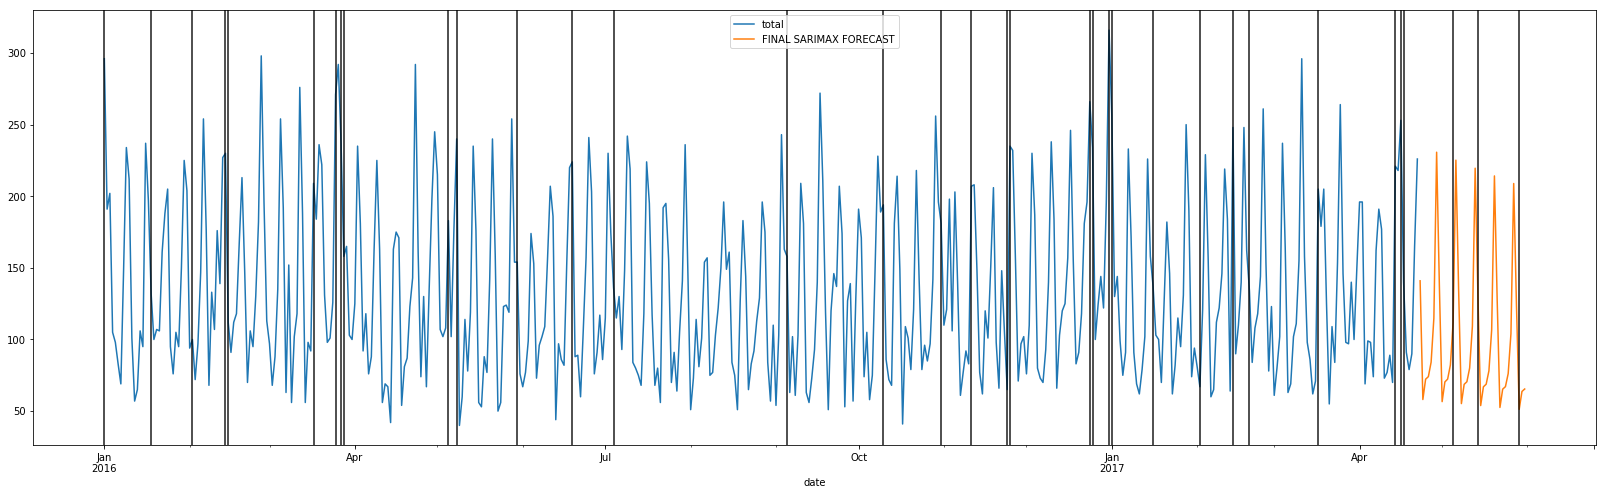

In [167]:
ax= df1['total'].plot(figsize=(28,8),legend=True)
fcast.plot(legend=True)

for day in df.query('holiday==1').index:
    ax.axvline(x=day, color ='black', alpha=0.9)

